In [1]:
from src.constants import SIM_COV_DIM, SIM_ACT_DIM, SIM_OUT_DIM
from src.models import (
    AdaptiveLinearModel,
    BehaviouralCloning,
    BehaviouralCloningLSTM,
    BehaviouralCloningDeep,
    RCAL,
    CIRL,
)  # noqa: F401
from src.data_loading import generate_linear_dataset, get_centre_data
import numpy as np
import torch
torch.manual_seed(41310)
np.random.seed(41310)

In [2]:
training_data = generate_linear_dataset(1, 100, seed=41310)
validation_data = generate_linear_dataset(1, 100, seed=41310).get_whole_batch()

In [3]:
true_omega = training_data.betas

In [4]:
len(true_omega[0][0][0])

2

In [5]:
true_omega[0][0][0]

array([-0.14378905, -0.64178285])

In [6]:
omegas = np.zeros((1,100,5,2))

for i in range(1):
    for j in range(100):
        for k in range(5):
            omegas[i,j,k] = true_omega[i][j][k]


In [7]:
"""
plt.plot(omegas[0,:,0,0])
plt.plot(omegas[0,:,1,0])
plt.plot(omegas[0,:,2,0])
plt.plot(omegas[0,:,3,0])
plt.plot(omegas[0,:,4,0])
plt.show()
"""

'\nplt.plot(omegas[0,:,0,0])\nplt.plot(omegas[0,:,1,0])\nplt.plot(omegas[0,:,2,0])\nplt.plot(omegas[0,:,3,0])\nplt.plot(omegas[0,:,4,0])\nplt.show()\n'

In [75]:
hyperparams = {
    "covariate_size": 5,
    "action_size": 2,
    "outcome_size": 1,
    "memory_hidden_size": 32,
    "memory_layers": 1,
    "memory_dropout": 0,
    "memory_size": 16,
    "outcome_hidden_size": 32,
    "outcome_layers": 0,
    "inf_hidden_size": 16,
    "inf_layers": 1,
    "inf_dropout": 0.5,
    "inf_fc_size": 32,
    "hidden_size": 64,
    "mem_reg": 0.2,
    "spread":4,
}

In [76]:
model = AdaptiveLinearModel
model = model(**hyperparams)
model.fit(
    training_data,
    batch_size=1,
    epochs=1000,
    learning_rate=0.01,
    validation_set=validation_data,
)

Epoch 1 average loss: 1.26736 (0.42 seconds)
Epoch 1 ACC: 0.43
Epoch 1 AUC: 0.42105
Epoch 1 APR: 0.48843
Epoch 1 NLL: 0.70711
Epoch 2 average loss: 1.16345 (0.2 seconds)
Epoch 2 ACC: 0.56
Epoch 2 AUC: 0.52138
Epoch 2 APR: 0.52042
Epoch 2 NLL: 0.69635
Epoch 3 average loss: 1.11215 (0.14 seconds)
Epoch 3 ACC: 0.48
Epoch 3 AUC: 0.608
Epoch 3 APR: 0.61432
Epoch 3 NLL: 0.68186
Epoch 4 average loss: 1.05556 (0.13 seconds)
Epoch 4 ACC: 0.51
Epoch 4 AUC: 0.53728
Epoch 4 APR: 0.54979
Epoch 4 NLL: 0.69153
Epoch 5 average loss: 1.0336 (0.33 seconds)
Epoch 5 ACC: 0.55
Epoch 5 AUC: 0.57182
Epoch 5 APR: 0.56693
Epoch 5 NLL: 0.67886
Epoch 6 average loss: 1.03481 (0.13 seconds)
Epoch 6 ACC: 0.57
Epoch 6 AUC: 0.5773
Epoch 6 APR: 0.56715
Epoch 6 NLL: 0.68463
Epoch 7 average loss: 0.99407 (0.15 seconds)
Epoch 7 ACC: 0.55
Epoch 7 AUC: 0.57127
Epoch 7 APR: 0.57189
Epoch 7 NLL: 0.68258
Epoch 8 average loss: 0.94179 (0.13 seconds)
Epoch 8 ACC: 0.56
Epoch 8 AUC: 0.54715
Epoch 8 APR: 0.5606
Epoch 8 NLL: 0.6818

In [77]:
info = model.inspection(training_data.get_whole_batch())
omega1 = info["omega_1_posterior"]
omega1 = omega1.detach().numpy()

omega0 = info["omega_0_posterior"]
omega0 = omega0.detach().numpy()

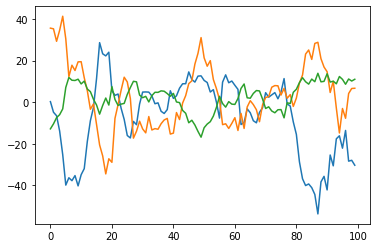

In [80]:
import matplotlib.pyplot as plt

plt.plot(omega1[0,:,0])
plt.plot(omega1[0,:,1])
plt.plot(omega1[0,:,2])
#plt.plot(omega1[0,:,3])
#plt.plot(omega1[0,:,4])
plt.show()

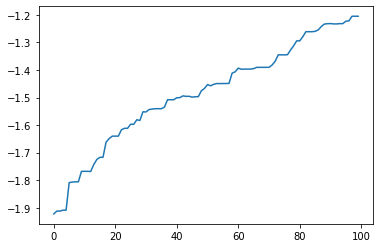

In [79]:
#plt.plot(omegas[0,:,0,0])
plt.plot(omegas[0,:,1,0])
#plt.plot(omegas[0,:,2,0])
#plt.plot(omegas[0,:,3,0])
#plt.plot(omegas[0,:,4,0])
plt.show()

In [13]:
omega_hat = np.zeros((10000,50,5,2))
omega_hat[:,:,:,0] = omega0
omega_hat[:,:,:,1] = omega1

ValueError: could not broadcast input array from shape (1,100,5) into shape (10000,50,5)

In [ ]:
((omegas - omega_hat)**2).mean()

101.89777802122298